In [1]:
import matplotlib as mlp
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import seaborn as sns

In [2]:
HOME = os.path.dirname(os.getcwd())
DATA_DIR = os.path.join(HOME, "DATA")
TCGA = os.path.join(DATA_DIR, "TCGA_SKCM")
ICI = os.path.join(DATA_DIR, "ICI")

In [3]:
# Load ICI enrichment scores
ICI_BRAF_enrichment_score = pd.read_csv(os.path.join(ICI,"BRAF_enrichment_score.csv"), index_col=0)
ICI_NRAS_enrichment_score = pd.read_csv(os.path.join(ICI,"NRAS_enrichment_score.csv"), index_col=0)
ICI_NF1_Lof_enrichment_score = pd.read_csv(os.path.join(ICI,"NF1_Lof_enrichment_score.csv"), index_col=0)

# Load TCGA enrichment scores
BRAF_enrichment_score = pd.read_csv(os.path.join(TCGA,"BRAF_enrichment_score.csv"), index_col=0)
NRAS_enrichment_score = pd.read_csv(os.path.join(TCGA,"NRAS_enrichment_score.csv"), index_col=0)
NF1_Lof_enrichment_score = pd.read_csv(os.path.join(TCGA,"NF1_Lof_enrichment_score.csv"), index_col=0)

## ICI enriched gene signatures

In [37]:
ICI_BRAF_enrichment_score.head()

,SRR10841996,SRR10842347,SRR10842352,SRR10842356,SRR10842358,SRR10842363,SRR10842365,SRR10842369,SRR10842375,SRR10842376,...,SRR10900564,SRR10900571,SRR10900573,SRR10900575,SRR10900583,SRR10900586,SRR10900589,SRR10900590,SRR10900591,SRR10900592
aDC,0.111007,0.000000e+00,0.088915,7.297086e-02,1.152589e-18,1.267745e-01,1.550439e-01,0.179234,0.000000,2.646583e-01,...,0.129972,0.345830,0.111305,0.140989,1.678410e-01,1.777016e-01,0.113827,9.292728e-02,1.766740e-01,3.429355e-18
Adipocytes,0.000000,6.601659e-20,0.026454,3.315856e-19,0.000000e+00,2.390986e-18,0.000000e+00,0.000000,0.000000,8.069148e-05,...,0.048717,0.006889,0.000406,0.000000,3.448878e-19,8.836678e-20,0.000000,1.081464e-19,6.218802e-20,0.000000e+00
Astrocytes,0.000000,2.467648e-17,0.000000,8.076420e-18,1.396031e-17,0.000000e+00,3.912741e-18,0.000000,0.000000,3.077335e-18,...,0.000000,0.026714,0.041369,0.097202,0.000000e+00,3.354691e-18,0.000000,0.000000e+00,3.440592e-20,0.000000e+00
B-cells,0.045499,1.552324e-02,0.019158,4.697472e-02,0.000000e+00,3.726408e-02,1.646294e-01,0.074027,0.004894,4.674372e-01,...,0.067551,0.440361,0.038221,0.045611,1.081145e-01,9.534601e-03,0.010853,4.347573e-02,1.065313e-01,0.000000e+00
Basophils,0.079627,1.096875e-03,0.041976,5.961834e-03,2.094250e-01,1.248413e-03,0.000000e+00,0.052571,0.001062,3.515241e-02,...,0.111171,0.019656,0.016193,0.011073,1.179384e-01,1.923872e-01,0.022591,0.000000e+00,1.147783e-01,1.940225e-02


In [26]:
# get the mean of enrichment scores of samples in each group
# ICI_BRAF_enrichment_score.loc[:,"mean"] = ICI_BRAF_enrichment_score.iloc[:,1:-1].mean(axis=1)
# ICI_NRAS_enrichment_score.loc[:,"mean"] = ICI_NRAS_enrichment_score.iloc[:,1:-1].mean(axis=1)
# ICI_NF1_Lof_enrichment_score.loc[:,"mean"] = ICI_NF1_Lof_enrichment_score.iloc[:,1:-1].mean(axis=1)

# BRAF_enrichment_score.loc[:,"mean"] = BRAF_enrichment_score.iloc[:,1:-1].mean(axis=1)
# NRAS_enrichment_score.loc[:,"mean"] = NRAS_enrichment_score.iloc[:,1:-1].mean(axis=1)
# NF1_Lof_enrichment_score.loc[:,"mean"] = NF1_Lof_enrichment_score.iloc[:,1:-1].mean(axis=1)


In [48]:
test_scores

,KS,BRAF_mean,NARS_mean,NF1.Lof_mean,NRAS_mean
aDC,0.078298,0.115476,0.0,0.071787,0.130438
Adipocytes,0.781728,0.002411,0.0,0.001136,0.000757
Astrocytes,0.000186,0.006083,0.0,0.022460,0.048127
B-cells,0.001465,0.076029,0.0,0.080849,0.030256
Basophils,0.782208,0.035104,0.0,0.068632,0.030717
...,...,...,...,...,...
Th2 cells,0.316585,0.034475,0.0,0.026574,0.023457
Tregs,0.252439,0.003174,0.0,0.004689,0.002705
ImmuneScore,0.172744,0.130974,0.0,0.090616,0.090811
StromaScore,0.032914,0.008147,0.0,0.021352,0.016494


In [28]:
# rank gene signatures
test_scores['KS_rank'] = test_scores['KS'].rank(ascending=1, method='min')
test_scores['BRAF_rank'] = test_scores['BRAF_mean'].rank(ascending=0, method='min')
test_scores['NRAS_rank'] = test_scores['NRAS_mean'].rank(ascending=0, method='min')
test_scores['NF1.Lof_rank'] = test_scores['NF1.Lof_mean'].rank(ascending=0, method='min')
test_scores

,KS,BRAF_mean,NARS_mean,NF1.Lof_mean,NRAS_mean,KS_rank,BRAF_rank,NRAS_rank,NF1.Lof_rank
aDC,0.078298,0.115476,0.0,0.071787,0.130438,25.0,6.0,3.0,10.0
Adipocytes,0.781728,0.002411,0.0,0.001136,0.000757,58.0,55.0,57.0,60.0
Astrocytes,0.000186,0.006083,0.0,0.022460,0.048127,4.0,42.0,11.0,21.0
B-cells,0.001465,0.076029,0.0,0.080849,0.030256,12.0,8.0,16.0,9.0
Basophils,0.782208,0.035104,0.0,0.068632,0.030717,59.0,17.0,15.0,11.0
...,...,...,...,...,...,...,...,...,...
Th2 cells,0.316585,0.034475,0.0,0.026574,0.023457,41.0,18.0,18.0,18.0
Tregs,0.252439,0.003174,0.0,0.004689,0.002705,38.0,49.0,51.0,44.0
ImmuneScore,0.172744,0.130974,0.0,0.090616,0.090811,33.0,4.0,8.0,7.0
StromaScore,0.032914,0.008147,0.0,0.021352,0.016494,22.0,32.0,29.0,23.0


In [29]:
# select top 6 gene signatures to plot score distributions
top_gs_by_pvalue = test_scores[test_scores['KS_rank'] <= 6.0].index
top_gs_by_BRAF_mean = test_scores[test_scores['BRAF_rank'] <= 6.0].index
top_gs_by_NRAS_mean = test_scores[test_scores['NRAS_rank'] <= 6.0].index
top_gs_by_NF1_Lof_mean = test_scores[test_scores['NF1.Lof_rank'] <= 6.0].index

top_pvalues = test_scores[test_scores['KS_rank'] <= 6.0].loc[:,'KS']

Text(0.5, 0.98, 'Differentially represented gene set signatures in ICI cohort')

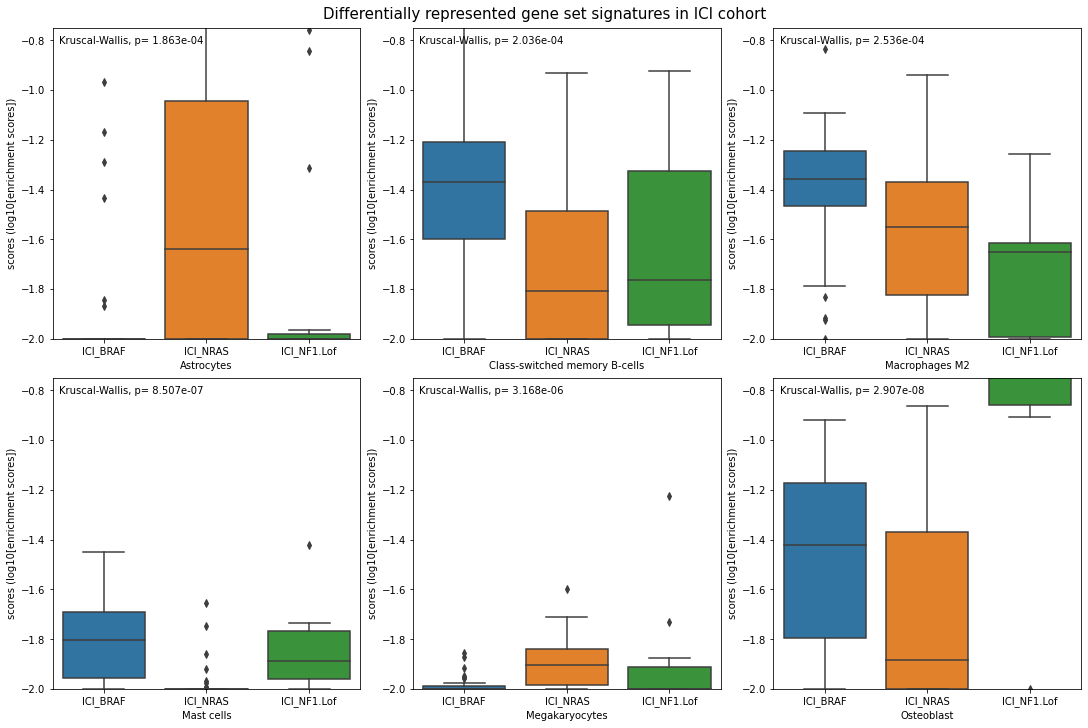

In [33]:
# plot score distributions for top-5 differentially represented gene signatures
ICI_BRAF_top_samples = ICI_BRAF_enrichment_score[ICI_BRAF_enrichment_score.index.isin(top_gs_by_pvalue)]
ICI_NRAS_top_samples = ICI_NRAS_enrichment_score[ICI_NRAS_enrichment_score.index.isin(top_gs_by_pvalue)]
ICI_NF1_Lof_top_samples = ICI_NF1_Lof_enrichment_score[ICI_NF1_Lof_enrichment_score.index.isin(top_gs_by_pvalue)]

# log transform for visualization
ICI_BRAF_top_samples = ICI_BRAF_top_samples.apply(lambda x : np.log10(x+0.01), axis=1)
ICI_NRAS_top_samples = ICI_NRAS_top_samples.apply(lambda x : np.log10(x+0.01), axis=1)
ICI_NF1_Lof_top_samples = ICI_NF1_Lof_top_samples.apply(lambda x : np.log10(x+0.01), axis=1)

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15,10), constrained_layout=True)
axs = axs.ravel()
for i, gs in enumerate(top_gs_by_pvalue):
    dc = {"scores (log10[enrichment scores])" : [], 'groups' : []}
    for g, samples in zip(['ICI_BRAF', 'ICI_NRAS', 'ICI_NF1.Lof'],[ICI_BRAF_top_samples, ICI_NRAS_top_samples, ICI_NF1_Lof_top_samples]):
        dc['scores (log10[enrichment scores])'].extend(samples.loc[gs,:].values.tolist())
        dc['groups'].extend([g]*samples.shape[1])
    df = pd.DataFrame(dc)
    sns.boxplot(data=df, x=df['groups'], y=df['scores (log10[enrichment scores])'], ax=axs[i])
    axs[i].set_ylim(-2.0, -0.75)
    axs[i].set_xlabel(gs)
    axs[i].text(0.02, 0.95, s="Kruscal-Wallis, p= {:.3e}".format(top_pvalues[gs]), 
                fontsize=10, transform=axs[i].transAxes)

fig.suptitle("Differentially represented gene set signatures in ICI cohort", fontsize=15)


## TCGA enriched gene signatures

In [35]:
gene_sets = BRAF_enrichment_score.index
# keep track of the score
test_scores = {gs : {'KS':0.0} for gs in gene_sets} #TODO: should also include Wilcoxon tests for one mutation group v.s. the other two groups

from scipy.stats import kruskal
for gs in gene_sets:
    BRAF_score = BRAF_enrichment_score.loc[gs,:]
    NRAS_score = NRAS_enrichment_score.loc[gs,:]
    NF1_Lof_score = NF1_Lof_enrichment_score.loc[gs,:]
    _,kpvalue = kruskal(BRAF_score, NRAS_score, NF1_Lof_score)
    test_scores[gs]['KS'] = kpvalue
    
test_scores = pd.DataFrame(test_scores).T

In [36]:
test_scores['KS_rank'] = test_scores['KS'].rank(ascending=1, method='min')
# select top 6 gene signatures to plot score distributions
top_gs_by_pvalue = test_scores[test_scores['KS_rank'] <= 6.0].index

top_pvalues = test_scores[test_scores['KS_rank'] <= 6.0].loc[:,'KS']

Text(0.5, 0.98, 'Differentially represented gene set signatures in TCGA cohort')

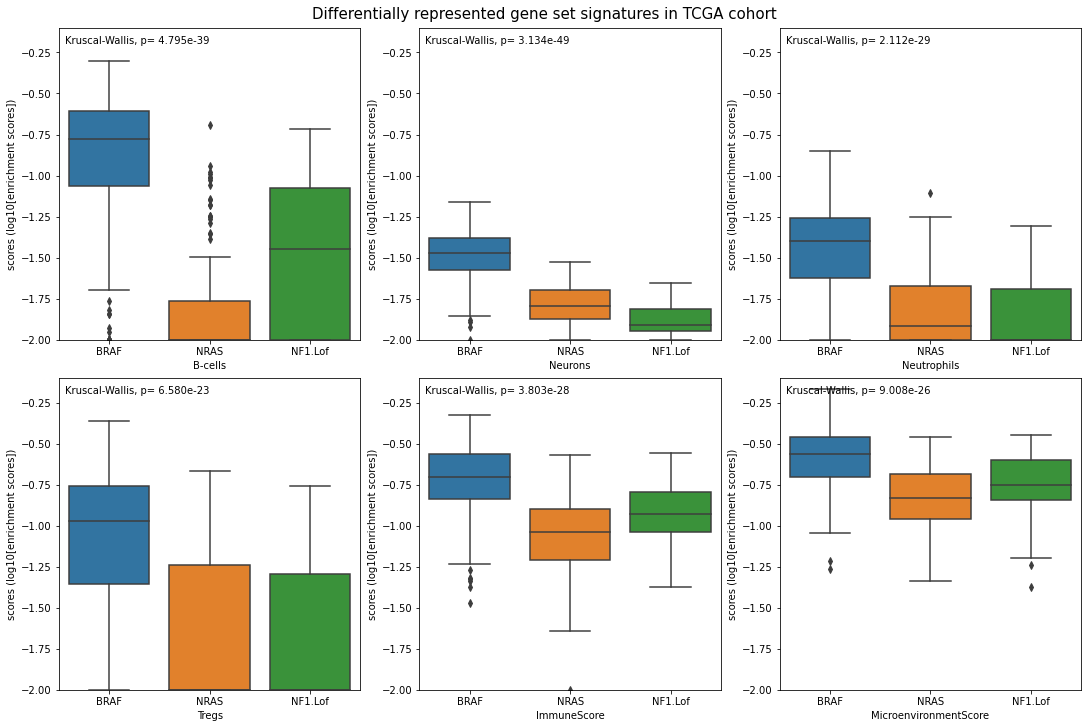

In [37]:
# plot score distributions for top-5 differentially represented gene signatures
BRAF_top_samples = BRAF_enrichment_score[BRAF_enrichment_score.index.isin(top_gs_by_pvalue)]
NRAS_top_samples = NRAS_enrichment_score[NRAS_enrichment_score.index.isin(top_gs_by_pvalue)]
NF1_Lof_top_samples = NF1_Lof_enrichment_score[NF1_Lof_enrichment_score.index.isin(top_gs_by_pvalue)]

# log transform for visualization
BRAF_top_samples = BRAF_top_samples.apply(lambda x : np.log10(x+0.01), axis=1)
NRAS_top_samples = NRAS_top_samples.apply(lambda x : np.log10(x+0.01), axis=1)
NF1_Lof_top_samples = NF1_Lof_top_samples.apply(lambda x : np.log10(x+0.01), axis=1)

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15,10), constrained_layout=True)
axs = axs.ravel()
for i, gs in enumerate(top_gs_by_pvalue):
    dc = {'scores (log10[enrichment scores])' : [], 'groups' : []}
    for g, samples in zip(['BRAF', 'NRAS', 'NF1.Lof'],[BRAF_top_samples, NRAS_top_samples, NF1_Lof_top_samples]):
        dc['scores (log10[enrichment scores])'].extend(samples.loc[gs,:].values.tolist())
        dc['groups'].extend([g]*samples.shape[1])
    df = pd.DataFrame(dc)
    sns.boxplot(data=df, x=df['groups'], y=df['scores (log10[enrichment scores])'], ax=axs[i])
    axs[i].set_ylim(-2.0, -0.1)
    axs[i].set_xlabel(gs)
    axs[i].text(0.02, 0.95, s="Kruscal-Wallis, p= {:.3e}".format(top_pvalues[gs]), 
                fontsize=10, transform=axs[i].transAxes)

fig.suptitle("Differentially represented gene set signatures in TCGA cohort", fontsize=15)